# Importing packages

In [139]:
import pandas as pd
import numpy as np
from numpy import *
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

#Date modification packages
from datetime import datetime
from datetime import timedelta

# Importing data

In [140]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


In [141]:
train['Split'] = 'Train'
test['Split'] = 'Test'
test.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Split
0,28,40,2012-01-06,False,50.43,3.599,5155.86,19549.51,218.29,636.73,5218.50,130.157516,12.187,A,206302,Test
1,18,93,2012-03-09,False,38.10,3.876,7410.18,368.19,25.46,1852.39,2332.07,137.506690,8.075,B,120653,Test
2,38,4,2011-05-27,False,76.67,4.087,NaN,NaN,NaN,NaN,NaN,129.062355,13.736,C,39690,Test
3,29,33,2010-03-12,False,43.43,2.805,NaN,NaN,NaN,NaN,NaN,131.784000,10.064,B,93638,Test
4,13,52,2010-10-29,False,45.12,2.841,NaN,NaN,NaN,NaN,NaN,126.436419,7.795,A,219622,Test


# Exploratory Data Analysis

In [142]:
t_len = len(train) # Get number of training examples
df = pd.concat([train,test],axis=0) # Join train and test
df.tail() # Get an overview of the data

,CPI,Date,Dept,Fuel_Price,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Size,Split,Store,Temperature,Type,Unemployment,Weekly_Sales
139114,129.826833,2011-11-18,91,3.669,False,86.59,6.00,NaN,NaN,3220.86,39690,Test,33,63.35,A,8.010,NaN
139115,130.645793,2012-03-02,85,3.242,False,25204.67,2436.75,167.88,16066.76,7289.69,219622,Test,13,32.36,A,6.104,NaN
139116,211.855267,2011-01-28,91,3.010,False,NaN,NaN,NaN,NaN,NaN,42988,Test,30,44.04,C,8.028,NaN
139117,197.655186,2012-06-08,32,3.741,False,8483.84,361.80,77.99,1640.00,6841.59,203007,Test,32,71.14,A,8.090,NaN
139118,141.843393,2012-04-13,33,4.187,False,5139.48,4770.63,53.84,1532.47,4176.90,204184,Test,27,52.22,A,8.253,NaN


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 139118
Data columns (total 17 columns):
CPI             421570 non-null float64
Date            421570 non-null object
Dept            421570 non-null int64
Fuel_Price      421570 non-null float64
IsHoliday       421570 non-null bool
MarkDown1       150681 non-null float64
MarkDown2       111248 non-null float64
MarkDown3       137091 non-null float64
MarkDown4       134967 non-null float64
MarkDown5       151432 non-null float64
Size            421570 non-null int64
Split           421570 non-null object
Store           421570 non-null int64
Temperature     421570 non-null float64
Type            421570 non-null object
Unemployment    421570 non-null float64
Weekly_Sales    282451 non-null float64
dtypes: bool(1), float64(10), int64(3), object(3)
memory usage: 55.1+ MB


In [144]:
df.describe()

,CPI,Dept,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Size,Store,Temperature,Unemployment,Weekly_Sales
count,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000,421570.000000,282451.000000
mean,171.201947,44.260317,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,136727.915739,22.200546,60.090059,7.960289,15983.429692
std,39.159276,30.492054,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,60980.583328,12.785297,18.447931,1.863296,22661.092494
min,126.064000,1.000000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,34875.000000,1.000000,-2.060000,3.879000,-4988.940000
25%,132.022667,18.000000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,93638.000000,11.000000,46.680000,6.891000,2079.330000
50%,182.318780,37.000000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,140167.000000,22.000000,62.090000,7.866000,7616.550000
75%,212.416993,74.000000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,202505.000000,33.000000,74.280000,8.572000,20245.745000
max,227.232807,99.000000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,219622.000000,45.000000,100.140000,14.313000,693099.360000


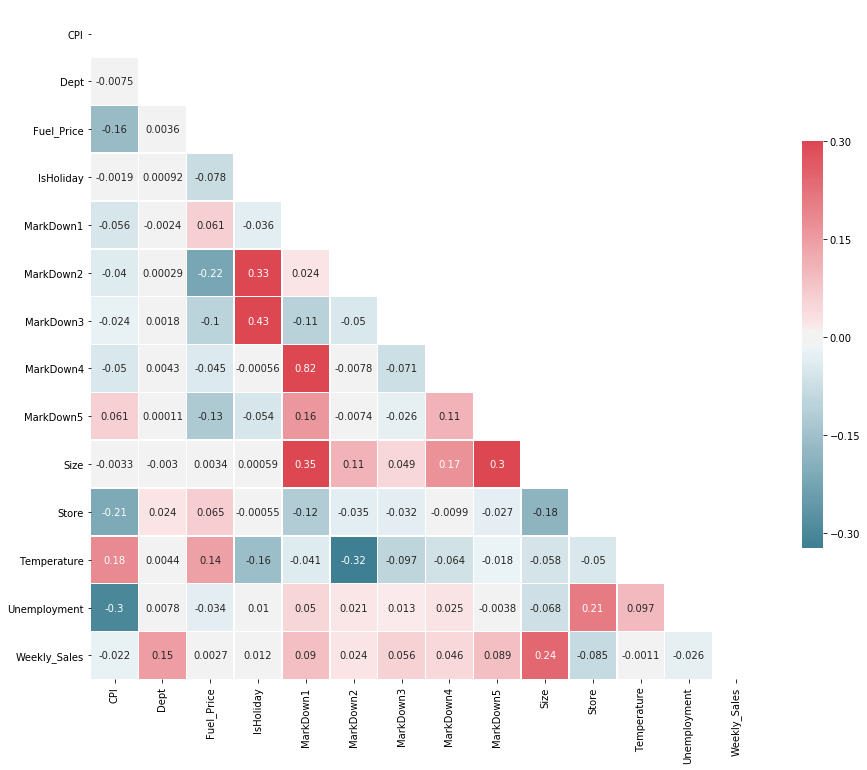

In [145]:
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, annot=True,cbar_kws={"shrink": .5})

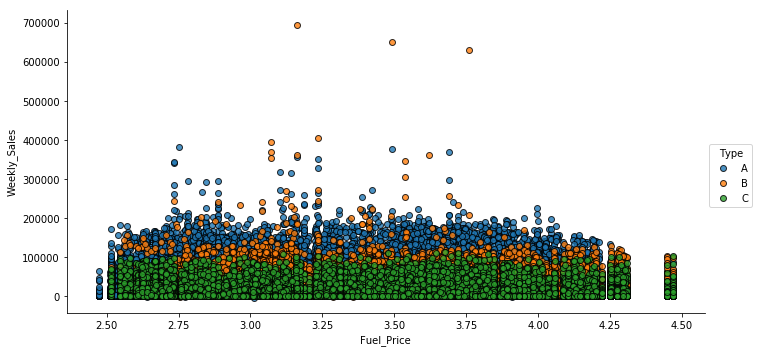

In [146]:
sns.lmplot('Fuel_Price', 'Weekly_Sales', data=df, fit_reg=False, hue='Type', aspect=2, scatter_kws={'linewidths':1,'edgecolor':'k'})

From this plot, we notice that type C stores have fewer sales in general.Although no further relationships appear evident from this analysis, there appears to be some outliers in our data.

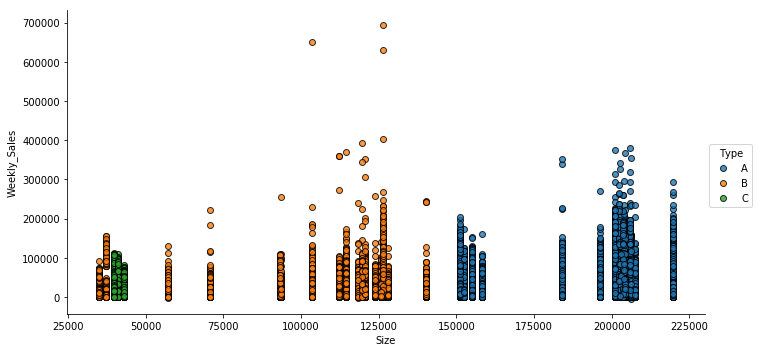

In [147]:
sns.lmplot('Size', 'Weekly_Sales', data=df, fit_reg=False, hue='Type', aspect = 2, scatter_kws={'linewidths':1,'edgecolor':'k'})

Type A stores are the biggest in Size. Hence, we can expect higher sales. Also for type C, the stores are smaller and the data represents lower weekly sales as compared to others.

In [148]:
df.loc[df['Weekly_Sales'] >300000].head()

,CPI,Date,Dept,Fuel_Price,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Size,Split,Store,Temperature,Type,Unemployment,Weekly_Sales
29352,132.836933,2010-11-26,72,3.070,True,NaN,NaN,NaN,NaN,NaN,114533,Train,23,34.95,B,5.287,369830.98
41292,210.515277,2010-11-26,72,2.735,True,NaN,NaN,NaN,NaN,NaN,184109,Train,39,67.75,A,8.476,339700.62
66187,132.836933,2010-11-26,72,3.070,True,NaN,NaN,NaN,NaN,NaN,120653,Train,18,40.81,B,9.331,353008.64
83588,129.836400,2011-11-25,72,3.760,True,174.72,329.0,141630.61,79.0,1009.98,126512,Train,10,60.68,B,7.874,630999.19
93294,126.669267,2010-11-26,72,2.752,True,NaN,NaN,NaN,NaN,NaN,205863,Train,4,48.08,A,7.127,381072.11


In [149]:
df.loc[df['Weekly_Sales'] >240000,"Date"].value_counts()

2011-11-25    15
2010-11-26    14
2010-12-24     8
2011-12-23     4
2010-12-17     2
2010-02-05     1
2011-08-26     1
Name: Date, dtype: int64

In [150]:
#Total Number of Stores
df['Store'].nunique()

45

In [151]:
df.isnull().sum()

CPI                  0
Date                 0
Dept                 0
Fuel_Price           0
IsHoliday            0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
Size                 0
Split                0
Store                0
Temperature          0
Type                 0
Unemployment         0
Weekly_Sales    139119
dtype: int64

# Data cleaning / wrangling

In [152]:
df = df.assign(md1_present = df.MarkDown1.notnull())
df = df.assign(md2_present = df.MarkDown2.notnull())
df = df.assign(md3_present = df.MarkDown3.notnull())
df = df.assign(md4_present = df.MarkDown4.notnull())
df = df.assign(md5_present = df.MarkDown5.notnull())


In [153]:
df.fillna(0, inplace=True)

In [154]:
df['Type'] = 'Type_' + df['Type'].map(str)

## Created new columns for indivudual Type, Store, Dept and Holiday as I will be performing Random Forest Algorithm to predict weekly sales.

In [155]:
# Create dummies
type_dummies = pd.get_dummies(df['Type'])
store_dummies = pd.get_dummies(df['Store'])
dept_dummies = pd.get_dummies(df['Dept'])
holiday_dummies = pd.get_dummies(df['IsHoliday'])

### Dummy variables: Dates

In [156]:
df['DateType'] = [datetime.strptime(date, '%Y-%m-%d').date() for date in df['Date'].astype(str).values.tolist()]
df['Month'] = [date.month for date in df['DateType']]
df['Month'] = 'Month-' + df['Month'].map(str)

Month_dummies = pd.get_dummies(df['Month'] )

In [157]:
df.head()

,CPI,Date,Dept,Fuel_Price,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Type,Unemployment,Weekly_Sales,md1_present,md2_present,md3_present,md4_present,md5_present,DateType,Month
0,136.213613,2011-08-26,92,3.796,False,0.00,0.0,0.0,0.00,0.00,...,Type_A,7.767,87235.57,False,False,False,False,False,2011-08-26,Month-8
1,128.616064,2011-03-25,22,3.480,False,0.00,0.0,0.0,0.00,0.00,...,Type_A,10.398,5945.97,False,False,False,False,False,2011-03-25,Month-3
2,211.265543,2010-12-03,28,2.708,False,0.00,0.0,0.0,0.00,0.00,...,Type_B,8.163,1219.89,False,False,False,False,False,2010-12-03,Month-12
3,214.878556,2010-09-17,9,2.582,False,0.00,0.0,0.0,0.00,0.00,...,Type_A,6.315,11972.71,False,False,False,False,False,2010-09-17,Month-9
4,138.106581,2012-05-18,55,4.029,False,12613.98,0.0,11.5,1705.28,3600.79,...,Type_A,8.150,8271.82,True,False,True,True,True,2012-05-18,Month-5


#### 'Special dates'. One variable for Christmas, one for black friday. We have to manually look up the dates of black friday and Christmas. 

In [158]:
df['Black_Friday'] = np.where((df['DateType']==datetime(2010, 11, 26).date()) | (df['DateType']==datetime(2011, 11, 25).date()), 
                              'yes', 'no')
df['Pre_christmas'] = np.where((df['DateType']==datetime(2010, 12, 23).date()) | (df['DateType']==datetime(2010, 12, 24).date()) 
                               | (df['DateType']==datetime(2011, 12, 23).date()) | (df['DateType']==datetime(2011, 12, 24).date()), 
                               'yes', 'no')

df['Black_Friday'] = 'Black_Friday_' + df['Black_Friday'].map(str)

df['Pre_christmas'] = 'Pre_christmas_' + df['Pre_christmas'].map(str)
Black_Friday_dummies = pd.get_dummies(df['Black_Friday'] )
Pre_christmas_dummies = pd.get_dummies(df['Pre_christmas'] )

In [159]:
# Add dummies
# We will actually skip some of these
#df = pd.concat([df,type_dummies,store_dummies,dept_dummies,holiday_dummies,Pre_christmas_dummies,Black_Friday_dummies,Month_dummies],axis=1)

df = pd.concat([df,holiday_dummies,Pre_christmas_dummies,Black_Friday_dummies],axis=1)

In [160]:
df.head(10)

,CPI,Date,Dept,Fuel_Price,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,DateType,Month,Black_Friday,Pre_christmas,False,True,Pre_christmas_no,Pre_christmas_yes,Black_Friday_no,Black_Friday_yes
0,136.213613,2011-08-26,92,3.796,False,0.00,0.00,0.00,0.00,0.00,...,2011-08-26,Month-8,Black_Friday_no,Pre_christmas_no,1,0,1,0,1,0
1,128.616064,2011-03-25,22,3.480,False,0.00,0.00,0.00,0.00,0.00,...,2011-03-25,Month-3,Black_Friday_no,Pre_christmas_no,1,0,1,0,1,0
2,211.265543,2010-12-03,28,2.708,False,0.00,0.00,0.00,0.00,0.00,...,2010-12-03,Month-12,Black_Friday_no,Pre_christmas_no,1,0,1,0,1,0
3,214.878556,2010-09-17,9,2.582,False,0.00,0.00,0.00,0.00,0.00,...,2010-09-17,Month-9,Black_Friday_no,Pre_christmas_no,1,0,1,0,1,0
4,138.106581,2012-05-18,55,4.029,False,12613.98,0.00,11.50,1705.28,3600.79,...,2012-05-18,Month-5,Black_Friday_no,Pre_christmas_no,1,0,1,0,1,0
5,130.826194,2012-03-16,91,3.529,False,8901.34,637.70,3.85,6169.81,2446.53,...,2012-03-16,Month-3,Black_Friday_no,Pre_christmas_no,1,0,1,0,1,0
6,132.614193,2010-08-06,14,2.942,False,0.00,0.00,0.00,0.00,0.00,...,2010-08-06,Month-8,Black_Friday_no,Pre_christmas_no,1,0,1,0,1,0
7,211.064660,2010-12-24,82,2.886,False,0.00,0.00,0.00,0.00,0.00,...,2010-12-24,Month-12,Black_Friday_no,Pre_christmas_yes,1,0,0,1,1,0
8,190.776322,2010-10-08,26,2.745,False,0.00,0.00,0.00,0.00,0.00,...,2010-10-08,Month-10,Black_Friday_no,Pre_christmas_no,1,0,1,0,1,0
9,190.171493,2012-03-02,72,3.816,False,22832.38,2515.25,4.00,13317.88,2560.48,...,2012-03-02,Month-3,Black_Friday_no,Pre_christmas_no,1,0,1,0,1,0


## Creating a new dataframe for calculating the median sales all the combinations of features: Type, Dept, Store, Month, Holiday. 

In [161]:
# Get dataframe with averages per store and department
Median_Sales = pd.DataFrame({'Median Sales' :df.loc[df['Split']=='Train'].
                        groupby(by=['Type','Dept','Store','Month','IsHoliday'])['Weekly_Sales'].median()}).reset_index()

Median_Sales.head(10)

,Type,Dept,Store,Month,IsHoliday,Median Sales
0,Type_A,1,1,Month-1,False,16894.400
1,Type_A,1,1,Month-10,False,29279.120
2,Type_A,1,1,Month-11,False,19300.025
3,Type_A,1,1,Month-11,True,19865.770
4,Type_A,1,1,Month-12,False,44912.860
5,Type_A,1,1,Month-12,True,21237.730
6,Type_A,1,1,Month-2,False,20124.220
7,Type_A,1,1,Month-2,True,41513.990
8,Type_A,1,1,Month-3,False,20962.245
9,Type_A,1,1,Month-4,False,35137.380


### Used Median instead of Average, as Average sales gets impacted by outliers. So median will be a better forcasting statistics than Average. 

In [162]:
# Adding a new column "Median Sales" to the main dataframe "df" - Merged by type, store, department and month
df = df.merge(Median_Sales, how = 'outer', on = ['Type','Dept','Store','Month','IsHoliday'])

In [163]:
df[['Type','Dept','Store','Month','IsHoliday','Median Sales']].head(20)

,Type,Dept,Store,Month,IsHoliday,Median Sales
0,Type_A,92,26,Month-8,False,93212.890
1,Type_A,92,26,Month-8,False,93212.890
2,Type_A,92,26,Month-8,False,93212.890
3,Type_A,92,26,Month-8,False,93212.890
4,Type_A,92,26,Month-8,False,93212.890
5,Type_A,92,26,Month-8,False,93212.890
6,Type_A,92,26,Month-8,False,93212.890
7,Type_A,92,26,Month-8,False,93212.890
8,Type_A,92,26,Month-8,False,93212.890
9,Type_A,92,26,Month-8,False,93212.890


In [164]:
# Fill Null values for Median Sales in train
df['Median Sales'].fillna(df['Median Sales'].loc[df['Split']=='Train'].median(), inplace=True)

In [165]:
df['Median Sales'].isnull().sum()

0

In [166]:
# Create a 'key' for easy access

df['Key'] = df['Type'].map(str)+'-Dept'+df['Dept'].map(str)+'-Store'+df['Store'].map(str)+'-'+df['Date'].map(str)+'-'+df['IsHoliday'].map(str)

In [167]:
df['Key'].head()

0    Type_A-Dept92-Store26-2011-08-26-False
1    Type_A-Dept92-Store26-2012-08-24-False
2    Type_A-Dept92-Store26-2011-08-05-False
3    Type_A-Dept92-Store26-2012-08-10-False
4    Type_A-Dept92-Store26-2012-08-17-False
Name: Key, dtype: object

## Lagged Variables

We will take a lagged variable of our store's previous weeks sales. To do so, we will first add a column with a one week lagged date, sort the data, and then match the lagged sales with the initial dataframe using the department and store number.

In [168]:
# Attach variable of last weeks time
df['DateLagged'] = df['DateType']- timedelta(days=7)
df[['DateType','DateLagged']].head()

,DateType,DateLagged
0,2011-08-26,2011-08-19
1,2012-08-24,2012-08-17
2,2011-08-05,2011-07-29
3,2012-08-10,2012-08-03
4,2012-08-17,2012-08-10


### Next, we create a sorted dataframe.

In [169]:
# Make a sorted dataframe. This will allow us to find lagged variables much faster!
sorted_df = df.sort_values(['Store', 'Dept','DateType'], ascending=[1,1,1])

In [170]:
sorted_df[['Store','Dept','DateType']].head()

,Store,Dept,DateType
292848,1,1,2010-02-05
302049,1,1,2010-02-12
292847,1,1,2010-02-19
292843,1,1,2010-02-26
217069,1,1,2010-03-05


In [171]:
sorted_df = sorted_df.reset_index(drop=True) # Reinitialize the row indices for the loop to work

In [172]:
sorted_df[['Store','Dept','DateType']].head()

,Store,Dept,DateType
0,1,1,2010-02-05
1,1,1,2010-02-12
2,1,1,2010-02-19
3,1,1,2010-02-26
4,1,1,2010-03-05


The code below will loop over the dataframe row wise, and check at each step if the previous week's sales are available. If not, the value will be filled with store and department average, which were retrieved previously.
Also printing the percent to just check the status of the loading process.

In [173]:
sorted_df['LaggedSales'] = np.nan # Initialize column
sorted_df['LaggedAvailable'] = np.nan # Initialize column

last=df.loc[0] # intialize last row for first iteration. Doesn't really matter what it is
row_len = sorted_df.shape[0]
for index, row in sorted_df.iterrows():
    lag_date = row["DateLagged"]
    # Check if it matches by comparing last weeks value to the compared date 
    # And if weekly sales aren't 0
    if((last['DateType']== lag_date) & (last['Weekly_Sales']>0)): 
        sorted_df.set_value(index, 'LaggedSales',last['Weekly_Sales'])
        sorted_df.set_value(index, 'LaggedAvailable',1)
    else:
        sorted_df.set_value(index, 'LaggedSales',row['Median Sales']) # Fill with median
        sorted_df.set_value(index, 'LaggedAvailable',0)

    last = row #Remember last row for speed
    if(index%int(row_len/10)==0): #See progress by printing every 10% interval
        print(str(int(index*100/row_len))+'% loaded')

0% loaded
10% loaded
20% loaded
30% loaded
40% loaded
50% loaded
60% loaded
70% loaded
80% loaded
90% loaded


In [174]:
sorted_df[['Dept', 'Store','DateType','DateLagged','LaggedSales','Weekly_Sales','Median Sales','LaggedAvailable']].head()

,Dept,Store,DateType,DateLagged,LaggedSales,Weekly_Sales,Median Sales,LaggedAvailable
0,1,1,2010-02-05,2010-01-29,20124.22,0.00,20124.220,0.0
1,1,1,2010-02-12,2010-02-05,41513.99,46039.49,41513.990,0.0
2,1,1,2010-02-19,2010-02-12,46039.49,0.00,20124.220,1.0
3,1,1,2010-02-26,2010-02-19,20124.22,19403.54,20124.220,0.0
4,1,1,2010-03-05,2010-02-26,19403.54,21827.90,20962.245,1.0


## Now, merge this new information with the existing dataset.

In [175]:
# Merge by store and department

df = df.merge(sorted_df[['Dept', 'Store','DateType','LaggedSales','LaggedAvailable']], 
              how = 'inner', on = ['Dept', 'Store','DateType'])

df.head()

,CPI,Date,Dept,Fuel_Price,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,True,Pre_christmas_no,Pre_christmas_yes,Black_Friday_no,Black_Friday_yes,Median Sales,Key,DateLagged,LaggedSales,LaggedAvailable
0,136.213613,2011-08-26,92,3.796,False,0.00,0.0,0.00,0.00,0.00,...,0,1,0,1,0,93212.89,Type_A-Dept92-Store26-2011-08-26-False,2011-08-19,93212.89,0.0
1,138.281452,2012-08-24,92,3.874,False,4507.08,33.6,149.46,1866.46,4685.63,...,0,1,0,1,0,93212.89,Type_A-Dept92-Store26-2012-08-24-False,2012-08-17,93212.89,1.0
2,136.054032,2011-08-05,92,3.903,False,0.00,0.0,0.00,0.00,0.00,...,0,1,0,1,0,93212.89,Type_A-Dept92-Store26-2011-08-05-False,2011-07-29,80427.06,1.0
3,138.143774,2012-08-10,92,3.772,False,5732.23,17.6,6.45,1524.63,2439.95,...,0,1,0,1,0,93212.89,Type_A-Dept92-Store26-2012-08-10-False,2012-08-03,93890.07,1.0
4,138.185710,2012-08-17,92,3.840,False,2430.95,16.0,5.54,829.70,3038.77,...,0,1,0,1,0,93212.89,Type_A-Dept92-Store26-2012-08-17-False,2012-08-10,111812.56,1.0


In [176]:
df['Sales_dif'] = df['Median Sales'] - df['LaggedSales']
df[['Dept', 'Store','DateType','LaggedSales','Weekly_Sales','Median Sales','Sales_dif']].head()

,Dept,Store,DateType,LaggedSales,Weekly_Sales,Median Sales,Sales_dif
0,92,26,2011-08-26,93212.89,87235.57,93212.89,0.00
1,92,26,2012-08-24,93212.89,88145.09,93212.89,0.00
2,92,26,2011-08-05,80427.06,96906.53,93212.89,12785.83
3,92,26,2012-08-10,93890.07,111812.56,93212.89,-677.18
4,92,26,2012-08-17,111812.56,93212.89,93212.89,-18599.67


In [177]:
df['Difference'] = df['Median Sales'] - df['Weekly_Sales']

In [178]:
df.head()

,CPI,Date,Dept,Fuel_Price,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Pre_christmas_yes,Black_Friday_no,Black_Friday_yes,Median Sales,Key,DateLagged,LaggedSales,LaggedAvailable,Sales_dif,Difference
0,136.213613,2011-08-26,92,3.796,False,0.00,0.0,0.00,0.00,0.00,...,0,1,0,93212.89,Type_A-Dept92-Store26-2011-08-26-False,2011-08-19,93212.89,0.0,0.00,5977.32
1,138.281452,2012-08-24,92,3.874,False,4507.08,33.6,149.46,1866.46,4685.63,...,0,1,0,93212.89,Type_A-Dept92-Store26-2012-08-24-False,2012-08-17,93212.89,1.0,0.00,5067.80
2,136.054032,2011-08-05,92,3.903,False,0.00,0.0,0.00,0.00,0.00,...,0,1,0,93212.89,Type_A-Dept92-Store26-2011-08-05-False,2011-07-29,80427.06,1.0,12785.83,-3693.64
3,138.143774,2012-08-10,92,3.772,False,5732.23,17.6,6.45,1524.63,2439.95,...,0,1,0,93212.89,Type_A-Dept92-Store26-2012-08-10-False,2012-08-03,93890.07,1.0,-677.18,-18599.67
4,138.185710,2012-08-17,92,3.840,False,2430.95,16.0,5.54,829.70,3038.77,...,0,1,0,93212.89,Type_A-Dept92-Store26-2012-08-17-False,2012-08-10,111812.56,1.0,-18599.67,0.00


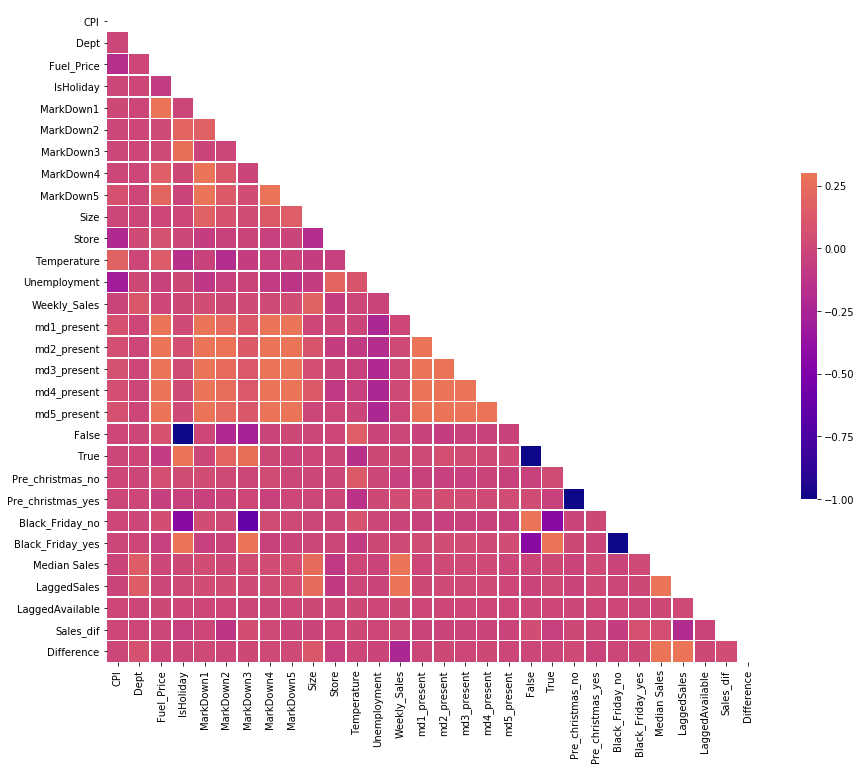

In [179]:
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 12))


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,cmap='plasma', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Splitting the data back again in the Train and Test datasets to start training the model using Train data set.

In [180]:
train = df.loc[df['Split']=='Train']
test = df.loc[df['Split']=='Test']
test.head(5)

,CPI,Date,Dept,Fuel_Price,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Pre_christmas_yes,Black_Friday_no,Black_Friday_yes,Median Sales,Key,DateLagged,LaggedSales,LaggedAvailable,Sales_dif,Difference
7,132.661613,2010-08-20,92,2.796,False,0.0,0.0,0.0,0.0,0.0,...,0,1,0,93212.89,Type_A-Dept92-Store26-2010-08-20-False,2010-08-13,80498.48,1.0,12714.41,93212.89
8,136.144129,2011-08-12,92,3.880,False,0.0,0.0,0.0,0.0,0.0,...,0,1,0,93212.89,Type_A-Dept92-Store26-2011-08-12-False,2011-08-05,96906.53,1.0,-3693.64,93212.89
9,132.614193,2010-08-06,92,2.792,False,0.0,0.0,0.0,0.0,0.0,...,0,1,0,93212.89,Type_A-Dept92-Store26-2010-08-06-False,2010-07-30,93212.89,0.0,0.00,93212.89
10,132.693226,2010-08-27,92,2.770,False,0.0,0.0,0.0,0.0,0.0,...,0,1,0,93212.89,Type_A-Dept92-Store26-2010-08-27-False,2010-08-20,93212.89,0.0,0.00,93212.89
11,136.183129,2011-08-19,92,3.820,False,0.0,0.0,0.0,0.0,0.0,...,0,1,0,93212.89,Type_A-Dept92-Store26-2011-08-19-False,2011-08-12,93212.89,0.0,0.00,93212.89


In [181]:
sum(test['Split']==False)

0

### Creating a list Select_Col containing all the independent variables to be used to train the model. 

In [182]:
Select_col = [
    #'Month',
    'CPI',
    'Fuel_Price',
    'MarkDown1',
    'MarkDown2',
    'MarkDown3',
    'MarkDown4',
    'MarkDown5',
    'Size',
    'Temperature',
    'Unemployment',
    
    
    
    'md1_present',
    'md2_present',
    'md3_present',
    'md4_present',
    'md5_present',

    'IsHoliday',
    'Pre_christmas_no',
    'Pre_christmas_yes',
    'Black_Friday_no',
    'Black_Friday_yes',    
    'LaggedSales',
    'Sales_dif',
    'LaggedAvailable'
    ]
display(df[Select_col].describe())
display(df[Select_col].head())

,CPI,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Size,Temperature,Unemployment,Pre_christmas_no,Pre_christmas_yes,Black_Friday_no,Black_Friday_yes,LaggedSales,Sales_dif,LaggedAvailable
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,171.201947,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,136727.915739,60.090059,7.960289,0.985808,0.014192,0.985865,0.014135,15907.380029,-179.734399,0.655172
std,39.159276,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,60980.583328,18.447931,1.863296,0.118283,0.118283,0.118049,0.118049,22521.689433,5538.988872,0.475313
min,126.064000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,34875.000000,-2.060000,3.879000,0.000000,0.000000,0.000000,0.000000,-1750.000000,-526108.280000,0.000000
25%,132.022667,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,93638.000000,46.680000,6.891000,1.000000,0.000000,1.000000,0.000000,2114.310000,-118.608750,0.000000
50%,182.318780,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,140167.000000,62.090000,7.866000,1.000000,0.000000,1.000000,0.000000,7583.440000,0.000000,1.000000
75%,212.416993,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,202505.000000,74.280000,8.572000,1.000000,0.000000,1.000000,0.000000,20107.905000,114.821250,1.000000
max,227.232807,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,219622.000000,100.140000,14.313000,1.000000,1.000000,1.000000,1.000000,693099.360000,557005.550000,1.000000


,CPI,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Size,Temperature,Unemployment,...,md4_present,md5_present,IsHoliday,Pre_christmas_no,Pre_christmas_yes,Black_Friday_no,Black_Friday_yes,LaggedSales,Sales_dif,LaggedAvailable
0,136.213613,3.796,0.00,0.0,0.00,0.00,0.00,152513,61.10,7.767,...,False,False,False,1,0,1,0,93212.89,0.00,0.0
1,138.281452,3.874,4507.08,33.6,149.46,1866.46,4685.63,152513,62.08,7.405,...,True,True,False,1,0,1,0,93212.89,0.00,1.0
2,136.054032,3.903,0.00,0.0,0.00,0.00,0.00,152513,63.16,7.767,...,False,False,False,1,0,1,0,80427.06,12785.83,1.0
3,138.143774,3.772,5732.23,17.6,6.45,1524.63,2439.95,152513,67.01,7.405,...,True,True,False,1,0,1,0,93890.07,-677.18,1.0
4,138.185710,3.840,2430.95,16.0,5.54,829.70,3038.77,152513,65.54,7.405,...,True,True,False,1,0,1,0,111812.56,-18599.67,1.0


## Spliting the Train dataset into training and test dataset - 80% and 20%. 20% to validate using the training data set.

In [183]:
from sklearn.model_selection import train_test_split

# Set seed for reproducability 
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(train[Select_col], train['Difference'], test_size=0.2, random_state=42)
print(X_test.shape)
print(y_test.shape)

(56491, 23)
(56491,)


## Fit the model on the training data

In [184]:
#Random forest model specification
#Machine learning tools
from sklearn.ensemble import RandomForestRegressor

RandomModel = RandomForestRegressor(n_estimators=20, criterion='mse', max_depth=None, 
                      min_samples_split=2, min_samples_leaf=1, 
                      min_weight_fraction_leaf=0.0, max_features='auto', 
                      max_leaf_nodes=None, min_impurity_decrease=0.0, 
                      min_impurity_split=None, bootstrap=True, 
                      oob_score=False, n_jobs=1, random_state=None, 
                      verbose=2, warm_start=False)

#Train on data
RandomModel.fit(X_train, y_train.ravel())

building tree 1 of 20


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s remaining:    0.0s


building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  1.1min finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
           oob_score=False, random_state=None, verbose=2, warm_start=False)

## Predictions from our model

In [185]:
Predict_Y_random = RandomModel.predict(X_test)
y_test = y_test.to_frame()

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.5s finished


### Merging the "Predicted" Predictive factor to the df_Out new dataframe. 

In [186]:
y_test['Predicted'] = Predict_Y_random
df_out = pd.merge(train,y_test[['Predicted']],how = 'left',left_index = True, right_index = True,suffixes=['_True','_Pred'])
df_out = df_out[~pd.isnull(df_out['Predicted'])]
df_out.head()

,CPI,Date,Dept,Fuel_Price,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Black_Friday_no,Black_Friday_yes,Median Sales,Key,DateLagged,LaggedSales,LaggedAvailable,Sales_dif,Difference,Predicted
6,132.630000,2010-08-13,92,2.810,False,0.00,0.00,0.00,0.00,0.00,...,1,0,93212.890,Type_A-Dept92-Store26-2010-08-13-False,2010-08-06,93212.890,0.0,0.000,12714.410,-2407.76425
17,126.606645,2010-03-19,22,2.743,False,0.00,0.00,0.00,0.00,0.00,...,1,0,6325.505,Type_A-Dept22-Store34-2010-03-19-False,2010-03-12,6325.505,0.0,0.000,625.475,-245.11050
18,130.896645,2012-03-23,22,3.759,False,3662.39,107.42,0.59,941.47,1934.93,...,1,0,6325.505,Type_A-Dept22-Store34-2012-03-23-False,2012-03-16,6325.505,0.0,0.000,296.905,540.25600
27,211.064660,2010-12-24,28,2.886,False,0.00,0.00,0.00,0.00,0.00,...,1,0,1340.680,Type_B-Dept28-Store21-2010-12-24-False,2010-12-17,1559.650,1.0,-218.970,-341.880,-267.95450
35,226.161598,2012-09-14,9,3.717,False,4678.98,0.00,12.29,1130.96,5427.34,...,1,0,13385.715,Type_A-Dept9-Store8-2012-09-14-False,2012-09-07,23918.090,1.0,-10532.375,-2654.665,-5228.59375


In [187]:
len(df_out['Predicted'])

56491

In [188]:
df_out['Predicted'].isnull().sum()

0

## Evaluating the model

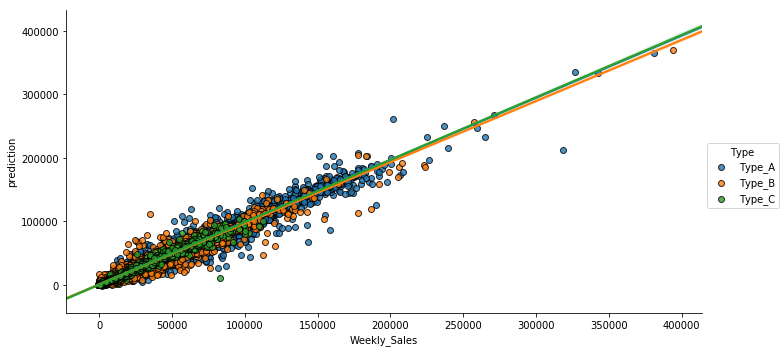

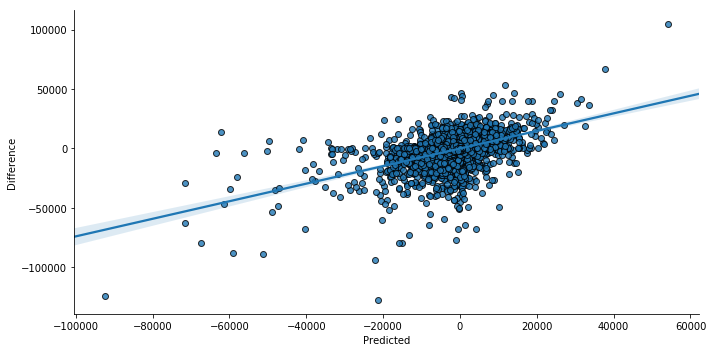

In [189]:

df_out['prediction'] = df_out['Median Sales']-df_out['Predicted']
sns.lmplot(x ='Weekly_Sales', y = 'prediction', hue= 'Type', data = df_out, aspect=2,scatter_kws={'linewidths':1,'edgecolor':'k'})
sns.lmplot(x ='Predicted', y = 'Difference',data = y_test, aspect=2, scatter_kws={'linewidths':1,'edgecolor':'k'})

The above graphs also explain that there is no "Heteroskedasticity" as for one point there is minimal variation.

In [190]:
print("Medians: "+str(sum(abs(df_out['Difference']))/df_out.shape[0]))
print("Random Forest: "+str(sum(abs(df_out['Weekly_Sales']-df_out['prediction']))/df_out.shape[0]))

Medians: 1470.8708814678264
Random Forest: 1445.8618085757125


### The Prediction looks nearly accurate: Let's train the model to get the maximum amount of information by increasing the number of trees(80) in the forest (n_estimators). And follow the same steps. Moreover, Now will be working on the entire train dataset.


In [191]:
FinalRF_model = RandomForestRegressor(n_estimators=80, criterion='mse', max_depth=None, 
                      min_samples_split=2, min_samples_leaf=1, 
                      min_weight_fraction_leaf=0.0, max_features='auto', 
                      max_leaf_nodes=None, min_impurity_decrease=0.0, 
                      min_impurity_split=None, bootstrap=True, 
                      oob_score=False, n_jobs=1, random_state=None, 
                      verbose=0, warm_start=False)

#Train on data
FinalRF_model.fit(train[Select_col], train['Difference'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [192]:
final_y_prediction = FinalRF_model.predict(test[['CPI','Fuel_Price','MarkDown1','MarkDown2','MarkDown3',
                                                'MarkDown4','MarkDown5','Size','Temperature','Unemployment',
                                                'md1_present','md2_present','md3_present','md4_present','md5_present','IsHoliday','Pre_christmas_no'
                                                ,'Pre_christmas_yes','Black_Friday_no','Black_Friday_yes','LaggedSales','Sales_dif',
                                                'LaggedAvailable']])

In [193]:
final_y_prediction # Final predictor 

array([ 8000.304375 ,  -620.5344375,  2646.55925  , ...,   161.149625 ,
       -1135.499125 ,  2598.291625 ])

### Adding the predictor in the FinalTestFile dataframe

In [194]:
FinalTestFile = pd.concat([test.reset_index(drop=True), pd.DataFrame(final_y_prediction)])


C:\Users\madhu\Anaconda3\lib\site-packages\pandas\core\indexes\api.py:77: RuntimeWarning: '<' not supported between instances of 'str' and 'bool', sort order is undefined for incomparable objects
  result = result.union(other)


### Predicting Weekly sales using median sales and the predictor.

In [195]:
FinalTestFile['Predicted Weekly Sales'] = FinalTestFile['Median Sales']-FinalTestFile[0]
FinalTestFile.head()

,CPI,Date,Dept,Fuel_Price,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Black_Friday_no,Black_Friday_yes,Median Sales,Key,DateLagged,LaggedSales,LaggedAvailable,Sales_dif,Difference,Predicted Weekly Sales
0,132.661613,2010-08-20,92.0,2.796,False,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,93212.89,Type_A-Dept92-Store26-2010-08-20-False,2010-08-13,80498.48,1.0,12714.41,93212.89,93211.89
1,136.144129,2011-08-12,92.0,3.880,False,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,93212.89,Type_A-Dept92-Store26-2011-08-12-False,2011-08-05,96906.53,1.0,-3693.64,93212.89,93211.89
2,132.614193,2010-08-06,92.0,2.792,False,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,93212.89,Type_A-Dept92-Store26-2010-08-06-False,2010-07-30,93212.89,0.0,0.00,93212.89,93211.89
3,132.693226,2010-08-27,92.0,2.770,False,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,93212.89,Type_A-Dept92-Store26-2010-08-27-False,2010-08-20,93212.89,0.0,0.00,93212.89,93211.89
4,136.183129,2011-08-19,92.0,3.820,False,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,93212.89,Type_A-Dept92-Store26-2011-08-19-False,2011-08-12,93212.89,0.0,0.00,93212.89,93211.89


In [196]:
len(FinalTestFile)

278238

## Creating a Submission key, based on combination of Date, Store and Dept.

In [197]:
FinalTestFile['Submission Key'] = FinalTestFile['Date'].map(str)+'-Store'+FinalTestFile['Store'].map(str)+'-Dept'+FinalTestFile['Dept'].map(str)

In [198]:
Weekly_Sales_Prediction = pd.DataFrame(FinalTestFile[['Submission Key','Predicted Weekly Sales']])

In [199]:
len(Weekly_Sales_Prediction)

278238

In [200]:
Weekly_Sales_Prediction.isnull().sum()

Submission Key                 0
Predicted Weekly Sales    139119
dtype: int64

# Final Predictions based on Submission key 

In [201]:
Weekly_Sales_Prediction.head(50)

,Submission Key,Predicted Weekly Sales
0,2010-08-20-Store26.0-Dept92.0,93211.890
1,2011-08-12-Store26.0-Dept92.0,93211.890
2,2010-08-06-Store26.0-Dept92.0,93211.890
3,2010-08-27-Store26.0-Dept92.0,93211.890
4,2011-08-19-Store26.0-Dept92.0,93211.890
5,2012-08-31-Store26.0-Dept92.0,93211.890
6,2012-03-30-Store34.0-Dept22.0,6324.505
7,2012-03-09-Store34.0-Dept22.0,6324.505
8,2010-03-12-Store34.0-Dept22.0,6324.505
9,2012-03-16-Store34.0-Dept22.0,6324.505


In [202]:
Weekly_Sales_Prediction.to_csv('Weekly_Sales_Prediction.csv',index=False)

# Thank you. :)